In [4]:
#Importing all the required packages for the project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [6]:
#Reading in the data

df = pd.read_csv(r"C:\Users\Venkatesh\Downloads\movies.csv")

In [7]:
#Now let's take a look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986


In [10]:
#Now let's take a look for the missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
writer - 0%
year - 0%
yearcorrect - 0%


In [11]:
# Exploring the data types of different column

df.dtypes


budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime          int64
score          float64
star            object
writer          object
year             int64
yearcorrect     object
dtype: object

In [12]:
#Change data type of colums

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [13]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


In [14]:
#Creating correct year column based on release date

df['yearcorrect'] = df['released'].astype(str).str[6:10]

In [15]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


In [16]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,18-12-2015,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,18-12-2009,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,19-12-1997,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,12-06-2015,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,04-05-2012,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000,La salvación,R,27-02-2015,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2014,2015
1074,0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440,Pusher,NOT RATED,30-08-1996,105,7.4,Kim Bodnia,Jens Dahl,1996,1996
2311,47000000,Pan Européenne,Belgium,Jaco Van Dormael,Drama,3600,Mr. Nobody,R,26-09-2013,141,7.9,Jared Leto,Jaco Van Dormael,2009,2013
1466,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Feroz,UNRATED,18-05-2001,108,6.8,Emily Perkins,Karen Walton,2000,2001


In [17]:
#Drop any Duplicates

df['company'].drop_duplicates().sort_values(ascending = False)

2422                         micro_scope
1233         Zucker Brothers Productions
1299             Zentropa Entertainments
184                 Zenith Entertainment
2191                     Zazen Produções
                      ...               
1682                        2 Loop Films
2894    1984 Private Defense Contractors
1071                       1492 Pictures
1608                           120 Films
1789     "DIA" Productions GmbH & Co. KG
Name: company, Length: 897, dtype: object

In [18]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,13-07-2016,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,22-01-2016,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,23-09-2016,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,17-06-2016,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


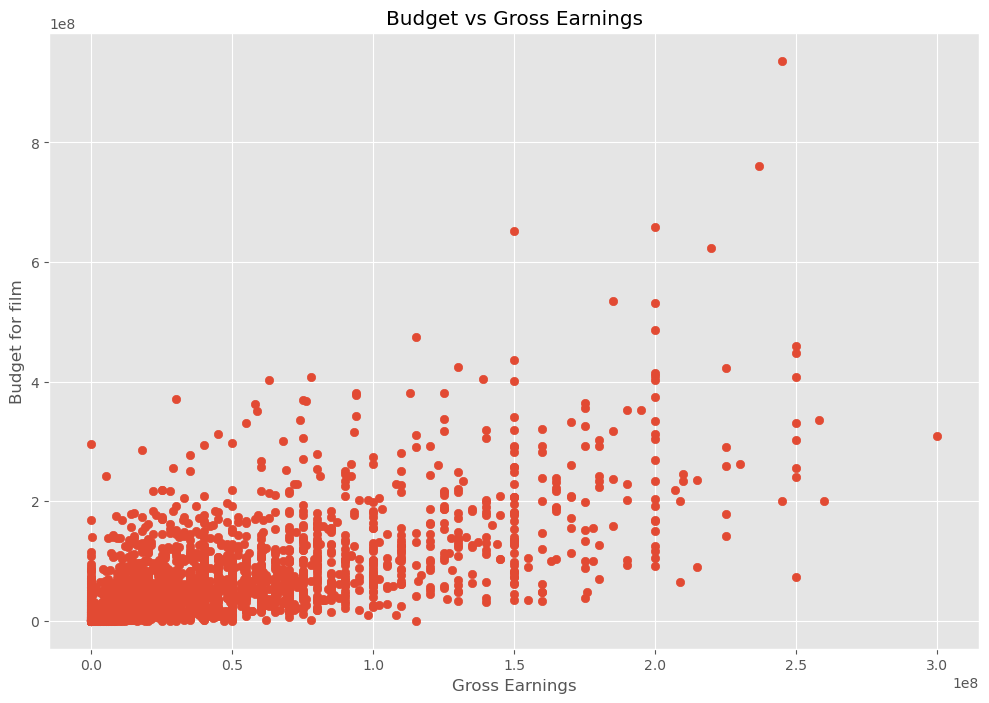

In [19]:
# Scatter plot with budget vs gross earnings

plt.scatter(x= df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

In [20]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-1986,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-1986,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-1986,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-1986,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-1986,96,6.8,Molly Ringwald,John Hughes,1986,1986


<Axes: xlabel='budget', ylabel='gross'>

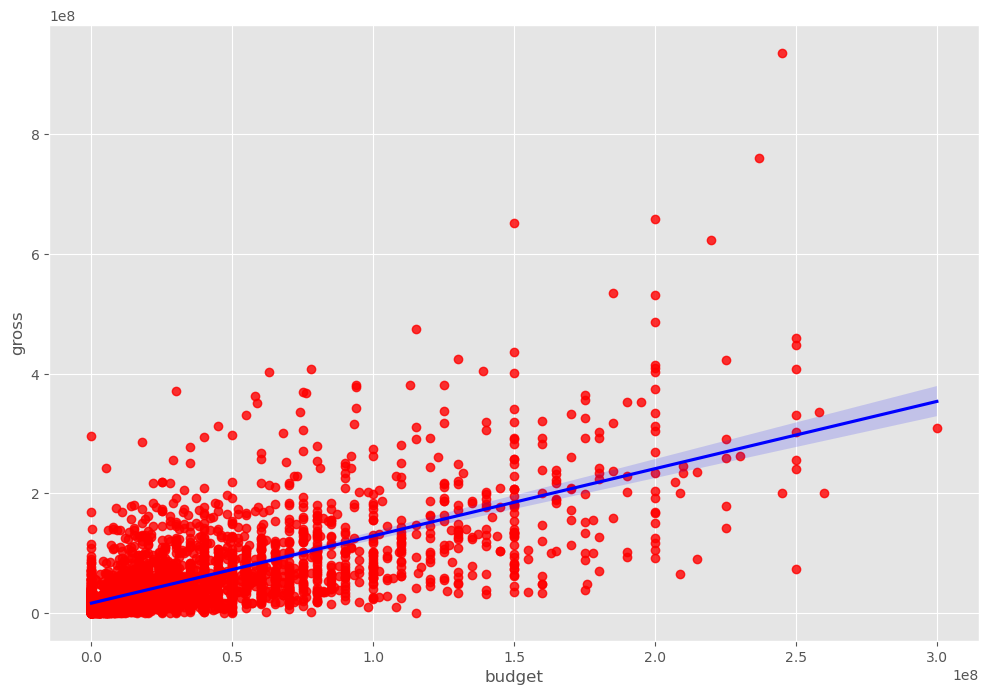

In [21]:
# Plot the budget vs gross collection using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws= {"color": "blue"})

In [22]:
df[['budget', 'gross', 'runtime', 'score', 'year']].corr()

,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


In [33]:
# High correlation between budget and gross

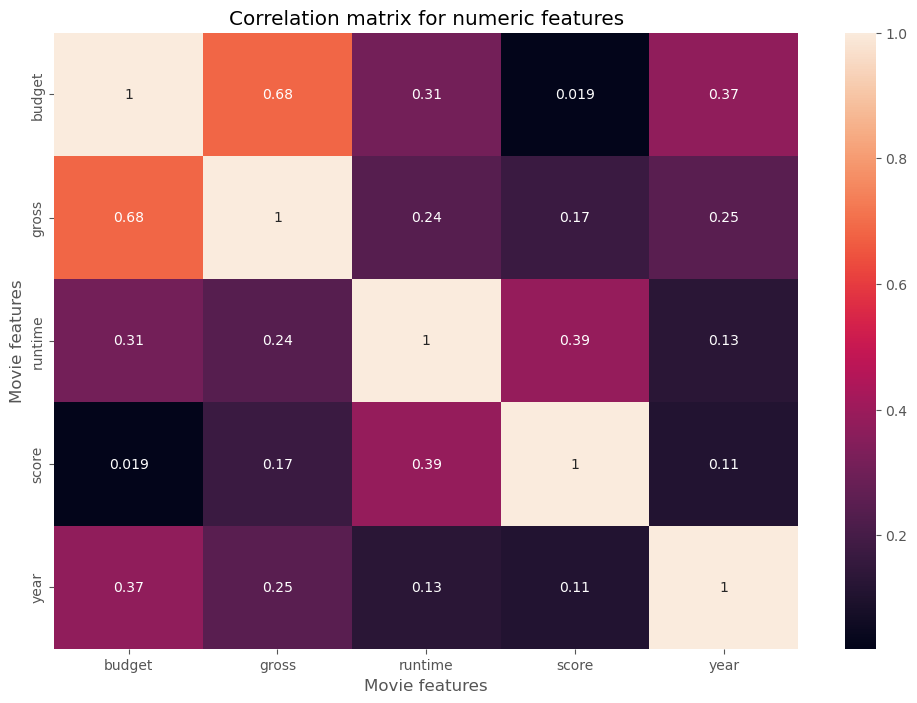

In [23]:
correlation_matrix = df[['budget', 'gross', 'runtime', 'score', 'year']].corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [24]:
# Looks at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,257,37,1018,1,52287414,2133,6,1212,89,8.1,1150,1722,1986,2
1,15000000,668,37,1244,0,179800601,2861,4,841,110,6.9,1098,874,1986,2
2,18500000,837,37,478,0,85160248,133,6,966,137,8.4,1039,768,1986,2
3,6000000,668,37,597,4,70136369,827,5,559,103,7.8,767,928,1986,2
4,9000000,668,37,449,4,40471663,1777,5,1543,96,6.8,824,928,1986,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,425,36,127,3,15425870,2513,6,692,127,7.0,150,542,2016,33
3096,27500000,565,37,224,4,35537564,640,6,1182,102,6.0,945,944,2016,33
3097,70000000,709,37,873,2,72655779,2166,4,1282,87,6.8,52,1362,2016,33
3098,50000000,632,37,988,0,127440871,441,5,909,107,6.3,315,727,2016,33


In [25]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,257,37,1018,1,52287414,2133,6,1212,89,8.1,1150,1722,1986,2
1,15000000,668,37,1244,0,179800601,2861,4,841,110,6.9,1098,874,1986,2
2,18500000,837,37,478,0,85160248,133,6,966,137,8.4,1039,768,1986,2
3,6000000,668,37,597,4,70136369,827,5,559,103,7.8,767,928,1986,2
4,9000000,668,37,449,4,40471663,1777,5,1543,96,6.8,824,928,1986,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,425,36,127,3,15425870,2513,6,692,127,7.0,150,542,2016,33
3096,27500000,565,37,224,4,35537564,640,6,1182,102,6.0,945,944,2016,33
3097,70000000,709,37,873,2,72655779,2166,4,1282,87,6.8,52,1362,2016,33
3098,50000000,632,37,988,0,127440871,441,5,909,107,6.3,315,727,2016,33


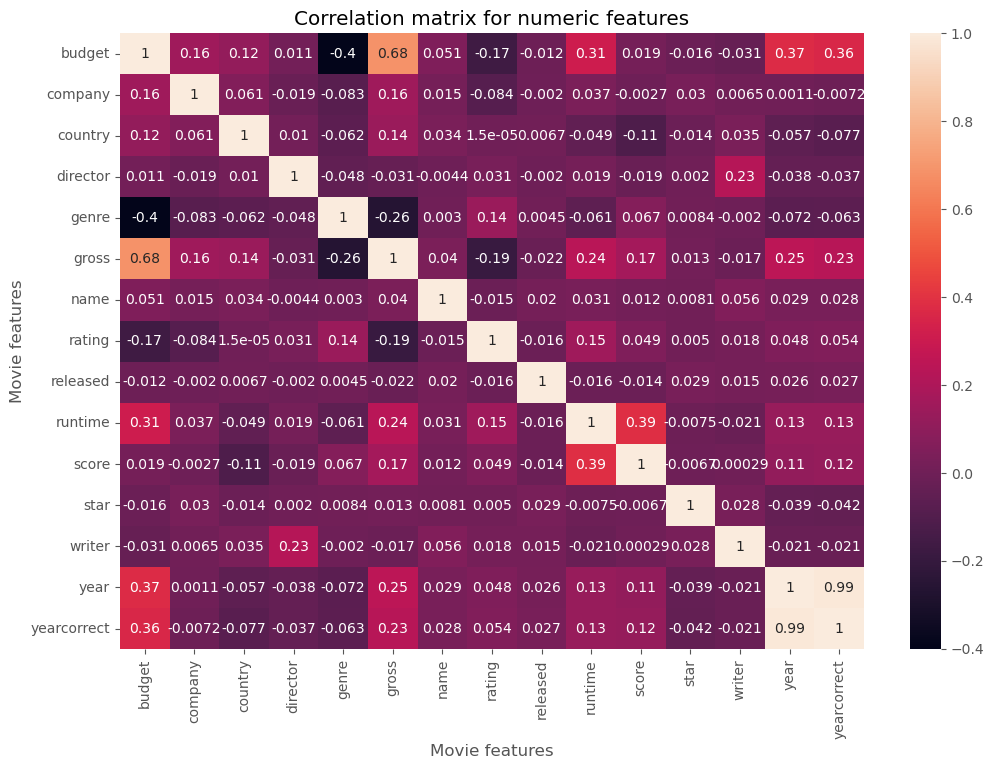

In [67]:
#Developing a heatmap for the numerized correlation matrix

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [68]:
#Correation matrix of the entire dataset

df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
budget,1.000000,0.157083,0.118863,0.011052,-0.401052,0.682588,0.051049,-0.171070,-0.012195,0.309652,0.019061,-0.016357,-0.031269,0.374904,0.357906
company,0.157083,1.000000,0.061089,-0.018730,-0.083068,0.156013,0.014947,-0.083646,-0.002015,0.037491,-0.002730,0.030054,0.006527,0.001121,-0.007162
country,0.118863,0.061089,1.000000,0.010291,-0.062478,0.138064,0.034133,0.000015,0.006652,-0.049398,-0.113568,-0.014146,0.035367,-0.057044,-0.077120
director,0.011052,-0.018730,0.010291,1.000000,-0.048337,-0.031221,-0.004434,0.030589,-0.002037,0.018846,-0.018591,0.001973,0.227905,-0.037946,-0.036772
genre,-0.401052,-0.083068,-0.062478,-0.048337,1.000000,-0.263051,0.002989,0.136055,0.004501,-0.061327,0.067234,0.008380,-0.001986,-0.072299,-0.062951
gross,0.682588,0.156013,0.138064,-0.031221,-0.263051,1.000000,0.039578,-0.191666,-0.021879,0.238183,0.171825,0.013428,-0.017184,0.246975,0.231577
name,0.051049,0.014947,0.034133,-0.004434,0.002989,0.039578,1.000000,-0.014934,0.020033,0.031283,0.011649,0.008144,0.055729,0.028571,0.027916
rating,-0.171070,-0.083646,0.000015,0.030589,0.136055,-0.191666,-0.014934,1.000000,-0.015758,0.153396,0.048781,0.004985,0.017506,0.048356,0.054358
released,-0.012195,-0.002015,0.006652,-0.002037,0.004501,-0.021879,0.020033,-0.015758,1.000000,-0.015753,-0.014246,0.028721,0.014980,0.025509,0.026836
runtime,0.309652,0.037491,-0.049398,0.018846,-0.061327,0.238183,0.031283,0.153396,-0.015753,1.000000,0.386864,-0.007494,-0.020986,0.127864,0.127333


In [26]:
#Unstacking the correlation matrix

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.157083
             country        0.118863
             director       0.011052
             genre         -0.401052
                              ...   
yearcorrect  score          0.119092
             star          -0.042013
             writer        -0.020759
             year           0.988856
             yearcorrect    1.000000
Length: 225, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.401052
budget       genre         -0.401052
gross        genre         -0.263051
genre        gross         -0.263051
rating       gross         -0.191666
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [29]:
# Filtering out the highly correlated pairs.

high_corr = sorted_pairs[(sorted_pairs) > 0.4]

high_corr

gross        budget         0.682588
budget       gross          0.682588
yearcorrect  year           0.988856
year         yearcorrect    0.988856
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [1]:
# Budget has the highest correlation to gross earnings
# Company has low correlation to gross earnings